##### GenAI coding with SVM ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm


%matplotlib inline

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedibrahemsa/recipes-muffins-cupcakes-in-svm")

print("Path to dataset files:", path)

/home/blackcat/BlackCat/Project_Personal/Generative AI/GenAIwithSVM/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 442/442 [00:00<00:00, 892kB/s]

Extracting files...
Path to dataset files: /home/blackcat/.cache/kagglehub/datasets/ahmedibrahemsa/recipes-muffins-cupcakes-in-svm/versions/1


In [3]:
DATA_DIR = path + '/recipes_muffins_cupcakes.csv'
recipes = pd.read_csv(DATA_DIR)
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


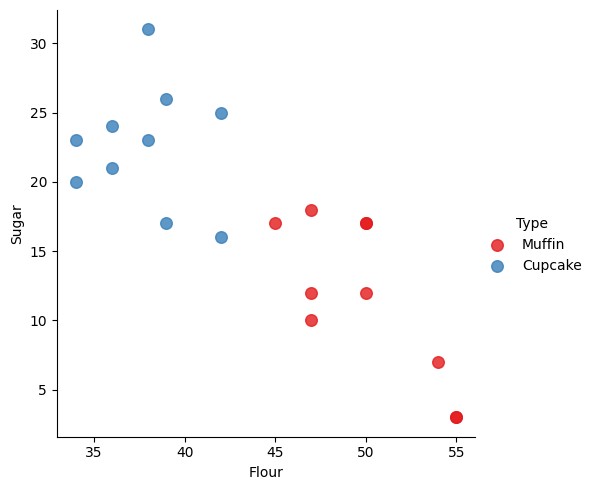

In [4]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [5]:
type_label = np.where(recipes['Type']=='Muffin',0,1)
recipe_features = recipes.columns.values[1:].tolist()
ingredients = recipes[['Flour', 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [6]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [11]:
#Get the seperating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx  - (model.intercept_[0]) / w[1]

# plot the pararrel that passs through the SVM

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


/tmp/ipykernel_7843/194742632.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy_down, 'k--', linewidth=2, color='blue')
/tmp/ipykernel_7843/194742632.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy_up, 'k--', linewidth=2, color='green')


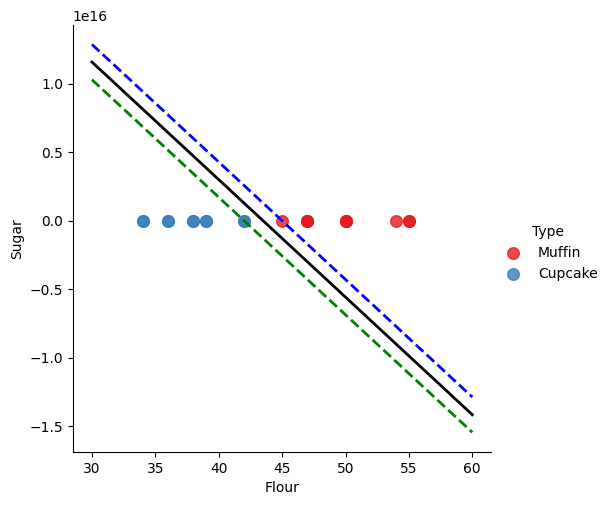

In [18]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--', linewidth=2, color='blue')
plt.plot(xx, yy_up, 'k--', linewidth=2, color='green')

In [20]:
# create a function to detect if it is a muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:
        print ('You\'re looking at a muffin recipe')
    else:
        print('You\'re looking at a cupcake recipe')

muffin_or_cupcake(50, 20)

You're looking at a muffin recipe


/tmp/ipykernel_7843/3953580158.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "yo" (-> color='y'). The keyword argument will take precedence.
  plt.plot(50, 20, 'yo', color='blue')


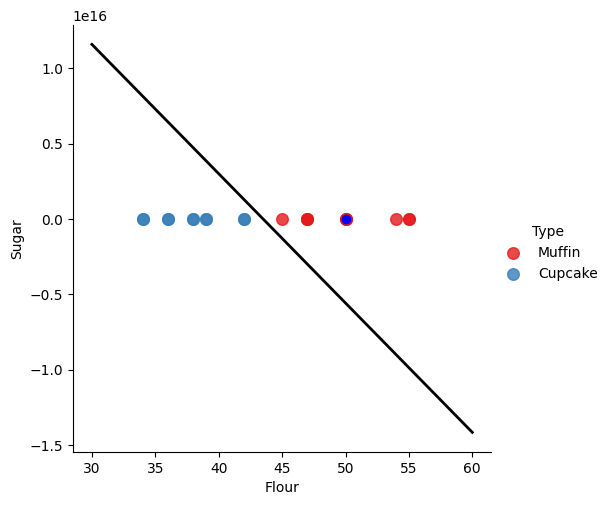

In [22]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', color='blue')